In [207]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [2]:
df = pd.read_csv("モデル構築用.csv", encoding="sjis")
origin_columns = df.columns
df.columns = ["offer_date","NO","offer_time","baitai_dai","baitai_shousai","uketsuke_jikantai","uketsuke_keitai","shinki_jidokeiyaku","toriatsukai_tenban","kanri_tenban","sex","age","birth","jis","doku","sinshoku_dai","sinshoku_shousai","koyo","shugyo","kaisha_kibo","nenshu","zaisha","jukyo","kyoju","yachin","kazoku_kousei","hoken_shokushu","shunyu_shoumei","dokushin","doukyo","fuyo","fuyo_child","shotoku_shoumei","meigi","jigyo_keitai","jigyosho","month12_jiko"]
df.head()

,offer_date,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,2013/2/3,1.820570e+12,133504,3,2,3,502,0,182,182,...,0,1,2,0,0,0,0,6,0,0
1,2013/6/18,5.050290e+12,145329,5,99,0,1,2814,2814,505,...,0,0,1,2,1,0,0,0,0,0
2,2013/6/28,1.820590e+12,115136,5,99,0,1,2779,2779,182,...,1,0,1,1,0,8,1,0,0,0
3,2013/8/9,1.270660e+12,95034,5,99,0,1,223,223,127,...,0,1,2,0,0,0,0,0,0,0
4,2014/1/27,2.090350e+12,165240,5,99,0,1,1836,1836,209,...,0,0,2,0,0,0,0,0,0,0


In [3]:
df = df.drop(['offer_date', 'birth'], axis=1)
df.head()

,NO,offer_time,baitai_dai,baitai_shousai,uketsuke_jikantai,uketsuke_keitai,shinki_jidokeiyaku,toriatsukai_tenban,kanri_tenban,sex,...,shunyu_shoumei,dokushin,doukyo,fuyo,fuyo_child,shotoku_shoumei,meigi,jigyo_keitai,jigyosho,month12_jiko
0,1.820570e+12,133504,3,2,3,502,0,182,182,1,...,0,1,2,0,0,0,0,6,0,0
1,5.050290e+12,145329,5,99,0,1,2814,2814,505,1,...,0,0,1,2,1,0,0,0,0,0
2,1.820590e+12,115136,5,99,0,1,2779,2779,182,1,...,1,0,1,1,0,8,1,0,0,0
3,1.270660e+12,95034,5,99,0,1,223,223,127,1,...,0,1,2,0,0,0,0,0,0,0
4,2.090350e+12,165240,5,99,0,1,1836,1836,209,1,...,0,0,2,0,0,0,0,0,0,0


In [13]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state=0)
train_X = train_df.drop('month12_jiko',axis=1)
test_X = test_df.drop('month12_jiko',axis=1)
train_y = train_df['month12_jiko']
test_y = test_df['month12_jiko']
train_lgb = lgb.Dataset(train_X, train_y)
test_lgb = lgb.Dataset(test_X, test_y, reference=train_lgb)

In [135]:
#テストデータの分類
print('事故', np.sum(test_df['month12_jiko'] == 1))
print('安全', np.sum(test_df['month12_jiko'] == 0))

事故 317
安全 1809


In [263]:
model_reg = lgb.LGBMRegressor()
model_reg.fit(train_X, train_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [264]:
pred_y_reg_array = model_reg.predict(test_X)
pred_y_reg = []
for i in pred_y_reg_array:
    if i >= 0:
        pred_y_reg.append(i)
    elif i < 0:
        pred_y_reg.append(0)
pred_y_reg = np.array(pred_y_reg)

In [265]:
pred_y_reg

array([0.13363704, 0.27658088, 0.12949993, ..., 0.36866357, 0.00379411,
       0.0071245 ])

In [266]:
model_cla = lgb.LGBMClassifier(max_dapth=20,learning_rate=0.1)
model_cla.fit(train_X, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_dapth=20,
        max_depth=-1, min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0)

In [267]:
pred_y_cla = model_cla.predict_proba(test_X)
pred_y_cla = np.argmax(pred_y_cla, axis=1)

In [268]:
#分類正解率
accuracy_score(test_y, pred_y_cla)

0.852304797742239

In [269]:
#RF分類の結果
confusion_matrix(test_y, pred_y_cla, labels=[0,1])

array([[1789,   20],
       [ 294,   23]])

# ==============================================================

In [270]:
#営業利益の算出(一次関数)
def operating_profit_linear(y_pred_reg, y_pred_cla, y_test, offset):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset:
            gain_list.append(0)
        elif i <= offset:
            gain_list.append(int(-(45*i)/offset+50))
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [271]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

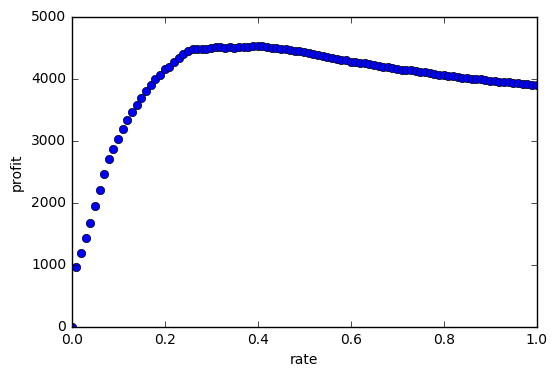

In [272]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [273]:
print(np.max(profit_list))
print(np.argmax(profit_list))

4522
39


In [274]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [275]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[1747,   62],
       [ 269,   48]])

# ==============================================================

In [276]:
#営業利益の算出(一次関数_ver2)
def operating_profit_linear_ver2(y_pred_reg, y_pred_cla, y_test, offset_n, offset_m):
    gain_list = []
    loss_list = []
    for i in y_pred_reg:
        if i > offset_n:
            gain_list.append(0)
        elif i <= offset_n and i >= offset_m:
            gain_list.append(int((-45/(offset_n-offset_m))*i+(45*offset_n/(offset_n-offset_m))+5))
        elif i < offset_m:
            gain_list.append(50)
    gain = np.sum(gain_list)
    for i in range(len(y_pred_cla)):
        if (y_pred_cla[i] == 0 and y_test[i] == 1):
            loss_list.append(gain_list[i])
        else:
            loss_list.append(0)
    loss = np.sum(loss_list)
    return gain, loss, int(gain*0.18-loss)

In [277]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [278]:
np.max(profit_list)

5776

In [187]:
profit_list_max_n = []
for i in range(len(profit_list)):
    profit_list_max_n.append(np.max(profit_list[i]))

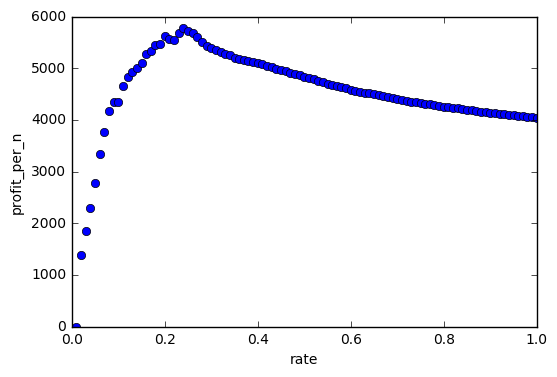

In [188]:
plt.figure()
plt.plot(para_list, profit_list_max_n, 'o')
plt.xlabel('rate')
plt.ylabel("profit_per_n")
plt.show()

# アンサンブル？

In [190]:
#RF回帰モデル作成
rf_reg = RandomForestRegressor(verbose = 1, n_estimators=100, max_depth=20)
rf_reg.fit(train_X,train_y)
rf_pred_y_reg = rf_reg.predict(test_X)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [195]:
#lightBGM回帰モデル作成
model_reg = lgb.LGBMRegressor()
model_reg.fit(train_X, train_y)
bgm_pred_y_reg_array = model_reg.predict(test_X)
bgm_pred_y_reg = []
for i in bgm_pred_y_reg_array:
    if i >= 0:
        bgm_pred_y_reg.append(i)
    elif i < 0:
        bgm_pred_y_reg.append(0)
bgm_pred_y_reg = np.array(bgm_pred_y_reg)

In [250]:
#XGboost回帰モデル作成
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(train_X, train_y)
xgb_pred_y_reg_array = xgb_reg.predict(test_X)
xgb_pred_y_reg = []
for i in xgb_pred_y_reg_array:
    if i >= 0:
        xgb_pred_y_reg.append(i)
    elif i < 0:
        xgb_pred_y_reg.append(0)
xgb_pred_y_reg = np.array(xgb_pred_y_reg)

In [251]:
rf_pred_y_reg

array([0.21789922, 0.21042553, 0.13973157, ..., 0.34278789, 0.1001676 ,
       0.01103735])

In [252]:
bgm_pred_y_reg

array([0.13363704, 0.27658088, 0.12949993, ..., 0.36866357, 0.00379411,
       0.0071245 ])

In [253]:
xgb_pred_y_reg

array([0.12463358, 0.22297856, 0.19597533, ..., 0.26176164, 0.0664835 ,
       0.0409306 ])

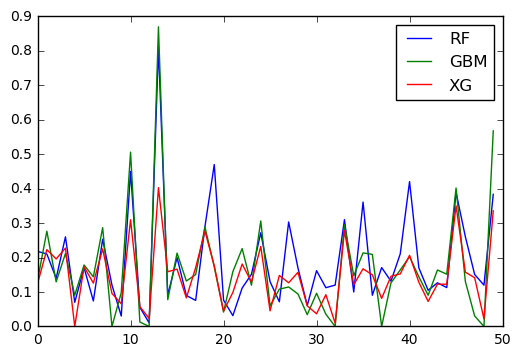

In [280]:
plt.figure()
plt.plot(rf_pred_y_reg[0:50], label="RF")
plt.plot(bgm_pred_y_reg[0:50], label="GBM")
plt.plot(xgb_pred_y_reg[0:50], label="XG")
plt.legend()
plt.show()

In [255]:
pred_y_reg=(rf_pred_y_reg+bgm_pred_y_reg+xgb_pred_y_reg)/3

In [256]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para in para_list:
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para:
            binary_pred_y_reg.append(1)
        elif j <= para:
            binary_pred_y_reg.append(0)
    profit_list.append(operating_profit_linear(pred_y_reg, binary_pred_y_reg, list(test_y), para)[2])
para_list.insert(0, 0)
profit_list.insert(0, 0)

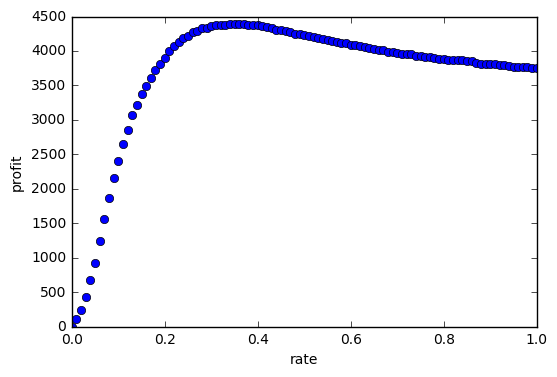

In [257]:
plt.figure()
plt.plot(para_list, profit_list, 'o')
plt.xlabel('rate')
plt.ylabel("profit")
plt.show()

In [258]:
print(np.max(profit_list))
print(np.argmax(profit_list))

4397
34


In [259]:
#最大利益の場合をバイナリ化
threshold = np.argmax(profit_list)/100
binary_pred_y_reg = []
for i in pred_y_reg:
    if i > threshold:
        binary_pred_y_reg.append(1)
    elif i <= threshold:
        binary_pred_y_reg.append(0)

In [260]:
#最大利益の場合でRF回帰の結果を0,1に変換した結果
confusion_matrix(test_y, binary_pred_y_reg, labels=[0,1])

array([[1730,   79],
       [ 262,   55]])

In [261]:
para_list = [i*0.01 for i in range(1,101)]
profit_list = []
for para_n in para_list:
    profit_list_m = []
    binary_pred_y_reg = []
    for j in pred_y_reg:
        if j > para_n:
            binary_pred_y_reg.append(1)
        elif j <= para_n:
            binary_pred_y_reg.append(0)
    for para_m in para_list:
        if para_m < para_n:
            profit_list_m.append(operating_profit_linear_ver2(pred_y_reg, binary_pred_y_reg, list(test_y), para_n, para_m)[2])
        else:
            profit_list_m.append(0)
            #profit_list_m.insert(0, 0)
    profit_list.append(profit_list_m)
#para_list.insert(0, 0)

In [262]:
np.max(profit_list)

5749